# C++ Graphics, Pair Production

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

(0, 3.5)

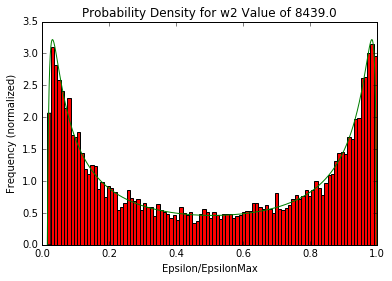

In [18]:
my_file = open('histogramdataall.txt','r') # read in the file
zArray = my_file.read().split('\n') # split the elements up using a delimiter
my_file.close()

my_file2 = open('w2inputvalue.txt','r') # read in the file
l = my_file2.read().split('\n')
my_file2.close()
w2 = float(l[0]) # user input w2 value

zArray.remove('') # delete the extra element created by the final newline
zFloat = np.zeros(len(zArray))
for i in range(len(zFloat)):
    zFloat[i] = float(zArray[i]) # turn the list of strings into a list of floats

E = w2
w = float(l[1]) # energy of soft photons, fixed
r = 2.81794E-13 # classical electron radius
N = int(l[2])

d, bins, patches = plt.hist(zFloat,100, normed=True, stacked=True, facecolor='r', alpha=1.0)
eArray = np.linspace(E/2.*(1-np.sqrt(1-1./(w*E))), E/2.*(1+np.sqrt(1-1./(w*E))),N)
Spec = np.pi*r*r/(4*w*w*w2**3)*(4*E**2/((E-eArray)*eArray)*np.log(4*w*(E-eArray)*eArray/E)-8*w*E+2*(2*w*E-1)*E**2/((E-eArray)*eArray)-(1-1./(w*E))*E**4/((E-eArray)**2*eArray**2))
for i in range(N):
    eArray[i] /= eArray[-1]
plt.plot(eArray,Spec/np.trapz(Spec,x=eArray)) # divide Spec by the area under the curve

plt.xlabel("Epsilon/EpsilonMax")
plt.ylabel("Frequency (normalized)")
plt.title("Probability Density for w2 Value of " + str(w2))
plt.ylim(0)